In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Student Depression Dataset.csv")

In [3]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

## Обработка данных

In [5]:
print(df.isnull().sum())
print(df.duplicated().sum())

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64
0


In [6]:
df = df.dropna().reset_index(drop=True)
print(len(df))

27898


In [7]:
df = df[df['Profession'] == 'Student']
df = df[df['Work Pressure'] == 0.0]
df = df.drop(columns=['Profession'])
df = df.drop(columns=['Work Pressure'])
df = df.drop(columns=['City'])

In [8]:
print(len(df))

27864


In [9]:
columns_object = df.select_dtypes(include=['object']).columns
columns_object

Index(['Gender', 'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?',
       'Family History of Mental Illness'],
      dtype='object')

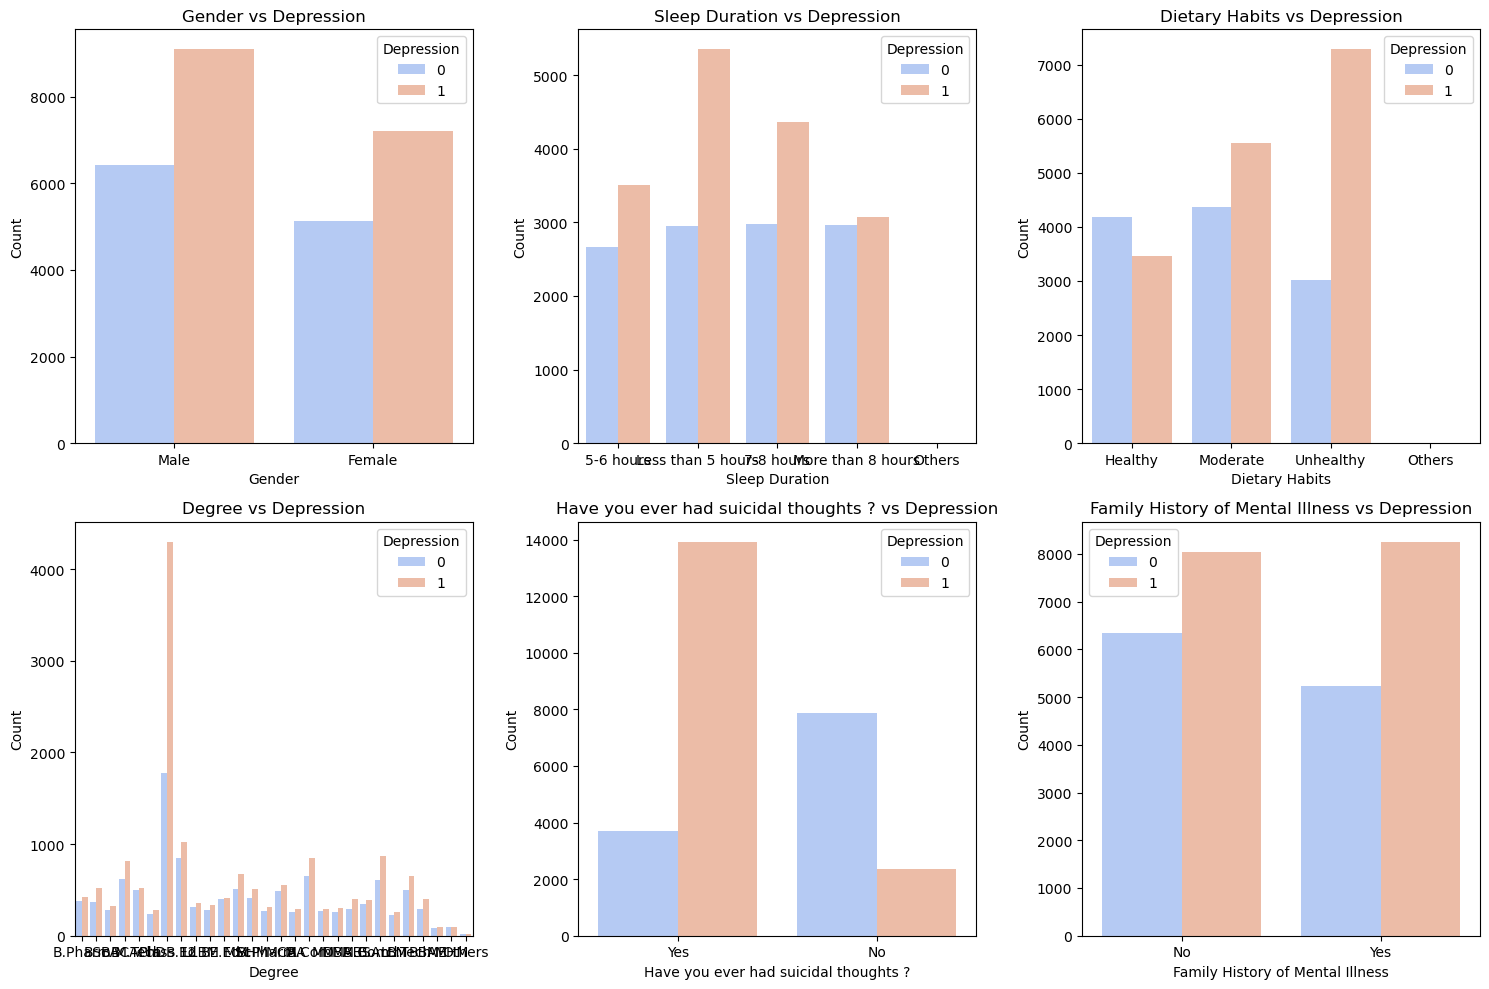

In [10]:
ncols = 3  
nrows = (len(columns_object) + ncols - 1) // ncols
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))
axes = axes.flatten()
for i, col in enumerate(columns_object):
    sns.countplot(data=df, x=col, hue='Depression', ax=axes[i], palette='coolwarm')
    axes[i].set_title(f'{col} vs Depression')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

id - Number of outliers: 0
Age - Number of outliers: 12
Academic Pressure - Number of outliers: 0
CGPA - Number of outliers: 6
Study Satisfaction - Number of outliers: 0
Job Satisfaction - Number of outliers: 5
Work/Study Hours - Number of outliers: 0
Financial Stress - Number of outliers: 0
Depression - Number of outliers: 0


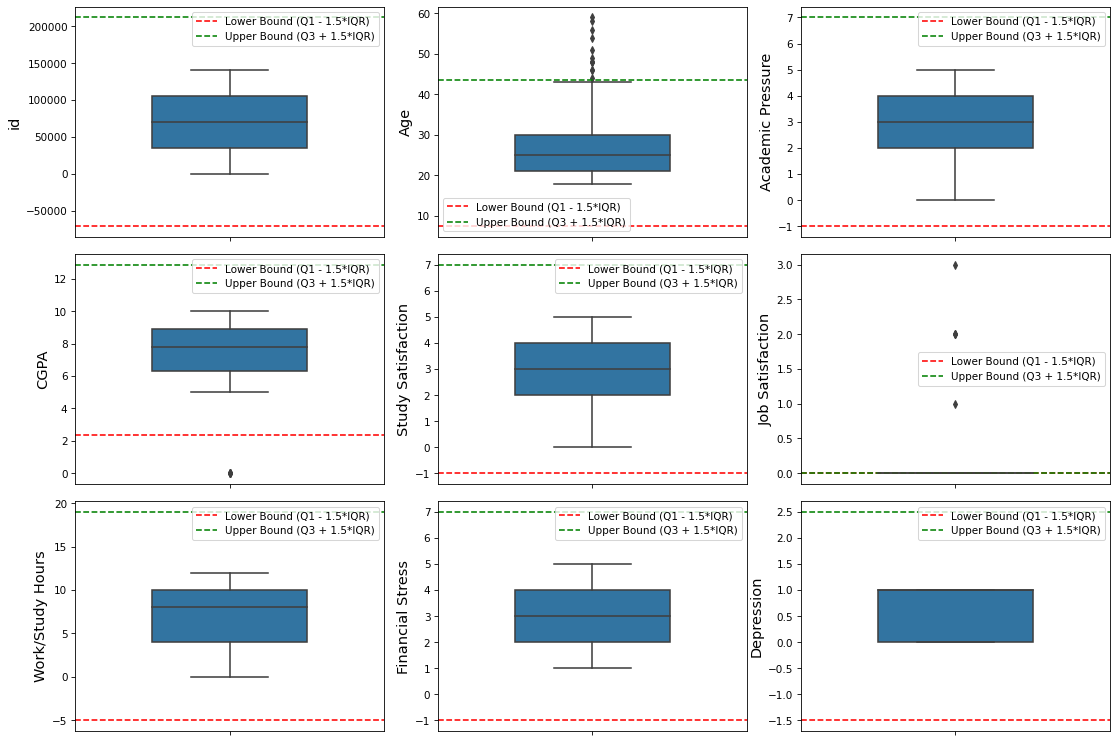

In [11]:
columns_numeric = df.select_dtypes(include=['number']).columns
fig, axes = plt.subplots(3, 3, figsize=(15, 10), dpi=75)
for idx, col in enumerate(columns_numeric):
    ax = axes[idx // 3, idx % 3]
    sns.boxplot(data=df, y=col, width=0.5, ax=ax)
    ax.set_ylabel(col, fontsize=14)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    num_outliers = outliers.shape[0]
    print(f"{col} - Number of outliers: {num_outliers}")
    ax.axhline(y=Q1 - 1.5 * IQR, color='r', linestyle='--', label='Lower Bound (Q1 - 1.5*IQR)')
    ax.axhline(y=Q3 + 1.5 * IQR, color='g', linestyle='--', label='Upper Bound (Q3 + 1.5*IQR)')
    ax.legend()
plt.tight_layout()
plt.show()

In [12]:
for col in columns_numeric:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
df = df.drop(columns=['Job Satisfaction'])

In [13]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in columns_object:
    print("transfer col:",col,"---------")
    df[col] = label_encoder.fit_transform(df[col])
    for i, class_name in enumerate(label_encoder.classes_):
        print(f"{class_name} -> {i}")
df.head()

transfer col: Gender ---------
Female -> 0
Male -> 1
transfer col: Sleep Duration ---------
5-6 hours -> 0
7-8 hours -> 1
Less than 5 hours -> 2
More than 8 hours -> 3
Others -> 4
transfer col: Dietary Habits ---------
Healthy -> 0
Moderate -> 1
Others -> 2
Unhealthy -> 3
transfer col: Degree ---------
B.Arch -> 0
B.Com -> 1
B.Ed -> 2
B.Pharm -> 3
B.Tech -> 4
BA -> 5
BBA -> 6
BCA -> 7
BE -> 8
BHM -> 9
BSc -> 10
Class 12 -> 11
LLB -> 12
LLM -> 13
M.Com -> 14
M.Ed -> 15
M.Pharm -> 16
M.Tech -> 17
MA -> 18
MBA -> 19
MBBS -> 20
MCA -> 21
MD -> 22
ME -> 23
MHM -> 24
MSc -> 25
Others -> 26
PhD -> 27
transfer col: Have you ever had suicidal thoughts ? ---------
No -> 0
Yes -> 1
transfer col: Family History of Mental Illness ---------
No -> 0
Yes -> 1


,id,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,1,33.0,5.0,8.97,2.0,0,0,3,1,3.0,1.0,0,1
1,8,0,24.0,2.0,5.90,5.0,0,1,10,0,3.0,2.0,1,0
2,26,1,31.0,3.0,7.03,5.0,2,0,5,0,9.0,1.0,1,0
3,30,0,28.0,3.0,5.59,2.0,1,1,7,1,4.0,5.0,1,1
4,32,0,25.0,4.0,8.13,3.0,0,1,17,1,1.0,1.0,0,0


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [15]:
df = df.reset_index(drop=True)
X = df.drop(columns=['Depression'])
y = df['Depression']
X = X.values if isinstance(X, (pd.DataFrame, pd.Series)) else X
y = y.values if isinstance(y, (pd.DataFrame, pd.Series)) else y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score
import optuna

In [17]:
accuracy_list = []
confusion_matrices = []

### Определите функцию objective для предоставления параметров Optuna и расчёта точности с использованием кросс-валидации.

In [18]:
def objective(trial, model_name, X, y):
    if model_name == "Bagging":
        model = BaggingClassifier(
            base_estimator=DecisionTreeClassifier(max_depth=trial.suggest_int("max_depth", 1, 5)),
            n_estimators=trial.suggest_int("n_estimators", 10, 50),
            max_samples=trial.suggest_float("max_samples", 0.5, 1.0),
            random_state=42
        )
    elif model_name == "RandomForest":
        model = RandomForestClassifier(
            n_estimators=trial.suggest_int("n_estimators", 10, 100),
            max_depth=trial.suggest_int("max_depth", 1, 10),
            random_state=42
        )
    elif model_name == "AdaBoost":
        model = AdaBoostClassifier(
            n_estimators=trial.suggest_int("n_estimators", 10, 100),
            learning_rate=trial.suggest_float("learning_rate", 0.01, 1.0),
            random_state=42
        )
    elif model_name == "GradientBoosting":
        model = GradientBoostingClassifier(
            n_estimators=trial.suggest_int("n_estimators", 10, 100),
            learning_rate=trial.suggest_float("learning_rate", 0.01, 1.0),
            max_depth=trial.suggest_int("max_depth", 1, 5),
            random_state=42
        )
    elif model_name == "HistGradientBoosting":
        model = HistGradientBoostingClassifier(
            max_iter=trial.suggest_int("n_estimators", 10, 100),
            learning_rate=trial.suggest_float("learning_rate", 0.01, 1.0),
            max_depth=trial.suggest_int("max_depth", 1, 10),
            random_state=42
        )
    elif model_name == "Bagging_DIY":
               
        base_estimator = DecisionTreeClassifier(max_depth=trial.suggest_int("max_depth", 1, 5))
        model = BaggingClassifier_DIY(
            n_estimators=trial.suggest_int("n_estimators", 10, 50),
            max_samples=trial.suggest_float("max_samples", 0.5, 1.0)
        )
        model.base_estimator = base_estimator 
    elif model_name == "AdaBoost_DIY":
        model = AdaBoostClassifier_DIY(
            base_estimator=DecisionTreeClassifier(max_depth=trial.suggest_int("max_depth", 1, 5)),
            n_estimators=trial.suggest_int("n_estimators", 10, 100),
            learning_rate=trial.suggest_float("learning_rate", 0.01, 1.0)
        )
    elif model_name == "XGBoost":
        model = xgb.XGBClassifier(
            n_estimators=trial.suggest_int("n_estimators", 50, 200),
            max_depth=trial.suggest_int("max_depth", 3, 10),
            learning_rate=trial.suggest_float("learning_rate", 0.01, 0.3),
            use_label_encoder=False,
            eval_metric="logloss",
            random_state=42
        )
    elif model_name == "LightGBM":
        model = lgb.LGBMClassifier(
            n_estimators=trial.suggest_int("n_estimators", 50, 200),
            max_depth=trial.suggest_int("max_depth", 3, 10),
            learning_rate=trial.suggest_float("learning_rate", 0.01, 0.3),
            random_state=42
        )
    elif model_name == "CatBoost":
        model = CatBoostClassifier(
            iterations=trial.suggest_int("n_estimators", 50, 200),
            depth=trial.suggest_int("max_depth", 3, 10),
            learning_rate=trial.suggest_float("learning_rate", 0.01, 0.3),
            verbose=0,
            random_seed=42)
    else:
        raise ValueError("Unsupported model name!")
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X, y, cv=skf, scoring="accuracy")
    model.fit(X, y)
    y_pred = model.predict(X)
    cm = confusion_matrix(y, y_pred)
    return np.mean(scores)
    

In [19]:
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier

In [20]:
def train_final_model(model_name, X_train, y_train, X_test, y_test, best_params):
    if model_name == "Bagging":
        max_depth = best_params.pop("max_depth")
        final_model = BaggingClassifier(
            estimator=DecisionTreeClassifier(max_depth=max_depth),
            **best_params,
            random_state=42
        )
    elif model_name == "RandomForest":
        final_model = RandomForestClassifier(**best_params, random_state=42)
    elif model_name == "AdaBoost":
        final_model = AdaBoostClassifier(**best_params, random_state=42)
    elif model_name == "GradientBoosting":
        final_model = GradientBoostingClassifier(**best_params, random_state=42)
    elif model_name == "HistGradientBoosting":
        max_iter = best_params.pop("n_estimators")
        final_model = HistGradientBoostingClassifier(
            max_iter=max_iter,
            **best_params,
            random_state=42
        )
    elif model_name == "Bagging_DIY":
        max_depth = best_params.pop("max_depth")
        final_model = BaggingClassifier_DIY(
            n_estimators=best_params["n_estimators"],
            max_samples=best_params["max_samples"],
            random_state=42
        )
        final_model.base_estimator = DecisionTreeClassifier(max_depth=max_depth)
    elif model_name == "AdaBoost_DIY":
        max_depth = best_params.pop("max_depth")
        final_model = AdaBoostClassifier_DIY(
            n_estimators=best_params["n_estimators"],
            learning_rate=best_params["learning_rate"]
        )
        final_model.base_estimator = DecisionTreeClassifier(max_depth=max_depth)
    elif model_name == "XGBoost":
        final_model = xgb.XGBClassifier(
            use_label_encoder=False,
            eval_metric="logloss",
            random_state=42,
            **best_params
        )
    elif model_name == "LightGBM":
        final_model = lgb.LGBMClassifier(random_state=42, **best_params)
    elif model_name == "CatBoost":
        final_model = CatBoostClassifier(
            verbose=0,
            random_seed=42,
            **best_params
        )
    else:
        raise ValueError("Unsupported model name!")
    final_model.fit(X_train, y_train)
    y_pred = final_model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    accuracy_list.append(acc)
    confusion_matrices.append(cm)
    return cm, acc

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.base import clone
from sklearn.base import BaseEstimator, ClassifierMixin

In [22]:
!pip install xgboost

In [23]:
!pip install lightgbm

In [24]:
!pip install catboost

In [25]:
import numpy as np
from sklearn.base import clone
class BaggingClassifier_DIY:
    def __init__(self, base_estimator=None, n_estimators=10, max_samples=0.8, random_state=None):
        self.base_estimator = base_estimator or DecisionTreeClassifier()
        self.n_estimators = n_estimators
        self.max_samples = max_samples
        self.random_state = random_state
        self.models = []
    def _bootstrap_sample(self, X, y):
        n_samples = X.shape[0]
        sample_indices = np.random.choice(n_samples, int(n_samples * self.max_samples), replace=True)
        if isinstance(X, (pd.DataFrame, pd.Series)) and isinstance(y, (pd.DataFrame, pd.Series)):
            return X.iloc[sample_indices], y.iloc[sample_indices]
        else:
            return X[sample_indices], y[sample_indices]
    def fit(self, X, y):
        np.random.seed(self.random_state)
        self.models = []
        for _ in range(self.n_estimators):
            model = clone(self.base_estimator)
            X_sample, y_sample = self._bootstrap_sample(X, y)
            model.fit(X_sample, y_sample)
            self.models.append(model)
        return self
    def predict(self, X):
        predictions = np.array([model.predict(X) for model in self.models])
        majority_vote = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=predictions)
        return majority_vote
    def get_params(self, deep=True):
        return {"base_estimator": self.base_estimator, 
                "n_estimators": self.n_estimators, 
                "max_samples": self.max_samples}
    def set_params(self, **params):
        for key, value in params.items():
            setattr(self, key, value)

In [26]:
class AdaBoostClassifier_DIY:
    def __init__(self, base_estimator=None, n_estimators=50, learning_rate=1.0):
        self.base_estimator = base_estimator or DecisionTreeClassifier(max_depth=1)
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.alphas = []
        self.models = []
        self.sample_weights = None
    def fit(self, X, y):
        n_samples, _ = X.shape
        self.sample_weights = np.ones(n_samples) / n_samples  # 初始化样本权重
        for _ in range(self.n_estimators):
            model = DecisionTreeClassifier(max_depth=1) if self.base_estimator is None else self.base_estimator
            model.fit(X, y, sample_weight=self.sample_weights)
            y_pred = model.predict(X)
            error = np.sum(self.sample_weights * (y != y_pred)) / np.sum(self.sample_weights)
            if error >= 0.5:
                break
            alpha = self.learning_rate * 0.5 * np.log((1 - error) / (error + 1e-10))
            self.models.append(model)
            self.alphas.append(alpha)
            self.sample_weights *= np.exp(-alpha * y * y_pred)
            self.sample_weights /= np.sum(self.sample_weights)  # 归一化
    def predict(self, X):
        predictions = np.zeros(X.shape[0])
        for alpha, model in zip(self.alphas, self.models):
            predictions += alpha * model.predict(X)
        return np.sign(predictions)
    def get_params(self, deep=True):
        return {"base_estimator": self.base_estimator, 
                "n_estimators": self.n_estimators, 
                "learning_rate": self.learning_rate}

    def set_params(self, **params):
        for key, value in params.items():
            setattr(self, key, value)

In [27]:
from sklearn.ensemble import (
    BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, 
    GradientBoostingClassifier, HistGradientBoostingClassifier
)
model_names = [
    "Bagging", "RandomForest", "AdaBoost", 
    "GradientBoosting", "HistGradientBoosting", 
    "Bagging_DIY", "AdaBoost_DIY"
]

In [28]:
for model_name in model_names:
    print(f"\nOptimizing {model_name}...")
    study = optuna.create_study(direction="maximize")
    study.optimize(lambda trial: objective(trial, model_name, X_train, y_train), n_trials=20)
    print(f"Best Hyperparameters for {model_name}: {study.best_params}")
    print(f"Best Cross-Validation Accuracy: {study.best_value:.4f}")
    cm,acc = train_final_model(model_name, X_train, y_train, X_test, y_test, study.best_params)
    print(f"Final Test Accuracy: {acc}")
    print("Final Confusion Matrix:\n")
    print(cm)

[I 2024-12-11 17:49:03,027] A new study created in memory with name: no-name-3a3b8725-0e3b-40a6-808a-51cf192b29d8



Optimizing Bagging...


D:\tools\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
D:\tools\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
D:\tools\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
D:\tools\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
D:\tools\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
D:\tools\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:15

D:\tools\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
D:\tools\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
D:\tools\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
D:\tools\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
D:\tools\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
[I 2024-12-11 17:49:26,916] Trial 6 finished with value: 0.829135

D:\tools\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
D:\tools\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
D:\tools\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
D:\tools\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
[I 2024-12-11 17:49:39,954] Trial 12 finished with value: 0.8289113355780022 and parameters: {'max_depth': 5, 'n_estimators': 18, 'max_samples': 0.6575466383535892}. Best is trial 11 with value: 0.8294949494949495.
D:\tools\anaconda3\Lib\site-packages\

D:\tools\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
D:\tools\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
[I 2024-12-11 17:49:56,892] Trial 18 finished with value: 0.781144781144781 and parameters: {'max_depth': 2, 'n_estimators': 21, 'max_samples': 0.7038086117350612}. Best is trial 11 with value: 0.8294949494949495.
D:\tools\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
D:\tools\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
D:\tools\anaconda3\Lib\site-packages\s

Best Hyperparameters for Bagging: {'max_depth': 5, 'n_estimators': 28, 'max_samples': 0.7219274406496223}
Best Cross-Validation Accuracy: 0.8295


[I 2024-12-11 17:50:01,581] A new study created in memory with name: no-name-e1ce0be9-2fca-45fa-8509-d22726886a7e


Final Test Accuracy: 0.8356976117794936
Final Confusion Matrix:

[[1770  547]
 [ 368 2884]]

Optimizing RandomForest...


[I 2024-12-11 17:50:03,501] Trial 0 finished with value: 0.8272502805836138 and parameters: {'n_estimators': 53, 'max_depth': 4}. Best is trial 0 with value: 0.8272502805836138.
[I 2024-12-11 17:50:05,853] Trial 1 finished with value: 0.8119416386083053 and parameters: {'n_estimators': 99, 'max_depth': 2}. Best is trial 0 with value: 0.8272502805836138.
[I 2024-12-11 17:50:09,944] Trial 2 finished with value: 0.8407182940516276 and parameters: {'n_estimators': 46, 'max_depth': 10}. Best is trial 2 with value: 0.8407182940516276.
[I 2024-12-11 17:50:12,699] Trial 3 finished with value: 0.8386531986531987 and parameters: {'n_estimators': 40, 'max_depth': 8}. Best is trial 2 with value: 0.8407182940516276.
[I 2024-12-11 17:50:16,116] Trial 4 finished with value: 0.8354657687991022 and parameters: {'n_estimators': 57, 'max_depth': 7}. Best is trial 2 with value: 0.8407182940516276.
[I 2024-12-11 17:50:18,961] Trial 5 finished with value: 0.8274747474747475 and parameters: {'n_estimators': 

Best Hyperparameters for RandomForest: {'n_estimators': 46, 'max_depth': 10}
Best Cross-Validation Accuracy: 0.8407


[I 2024-12-11 17:50:59,163] A new study created in memory with name: no-name-961849ee-99db-495f-aee7-dce03bc7f43a


Final Test Accuracy: 0.8509606751660981
Final Confusion Matrix:

[[1829  488]
 [ 342 2910]]

Optimizing AdaBoost...


[I 2024-12-11 17:51:02,474] Trial 0 finished with value: 0.8453423120089786 and parameters: {'n_estimators': 53, 'learning_rate': 0.4113032737408602}. Best is trial 0 with value: 0.8453423120089786.
[I 2024-12-11 17:51:04,839] Trial 1 finished with value: 0.8443097643097642 and parameters: {'n_estimators': 38, 'learning_rate': 0.7825500068590634}. Best is trial 0 with value: 0.8453423120089786.
[I 2024-12-11 17:51:06,961] Trial 2 finished with value: 0.8343434343434344 and parameters: {'n_estimators': 34, 'learning_rate': 0.19287158692983997}. Best is trial 0 with value: 0.8453423120089786.
[I 2024-12-11 17:51:08,656] Trial 3 finished with value: 0.8418855218855219 and parameters: {'n_estimators': 27, 'learning_rate': 0.8347525371909489}. Best is trial 0 with value: 0.8453423120089786.
[I 2024-12-11 17:51:09,893] Trial 4 finished with value: 0.8410774410774412 and parameters: {'n_estimators': 19, 'learning_rate': 0.5522775309824052}. Best is trial 0 with value: 0.8453423120089786.
[I 2

Best Hyperparameters for AdaBoost: {'n_estimators': 97, 'learning_rate': 0.3118549941514137}
Best Cross-Validation Accuracy: 0.8454


[I 2024-12-11 17:52:11,014] A new study created in memory with name: no-name-12458254-837e-4e3e-b2fb-70a89e93d1fa


Final Test Accuracy: 0.8570659005207398
Final Confusion Matrix:

[[1845  472]
 [ 324 2928]]

Optimizing GradientBoosting...


[I 2024-12-11 17:52:32,850] Trial 0 finished with value: 0.8358698092031427 and parameters: {'n_estimators': 99, 'learning_rate': 0.3639565479809737, 'max_depth': 5}. Best is trial 0 with value: 0.8358698092031427.
[I 2024-12-11 17:52:38,777] Trial 1 finished with value: 0.8330864197530865 and parameters: {'n_estimators': 34, 'learning_rate': 0.8243370529837082, 'max_depth': 4}. Best is trial 0 with value: 0.8358698092031427.
[I 2024-12-11 17:52:45,973] Trial 2 finished with value: 0.8420650953984288 and parameters: {'n_estimators': 80, 'learning_rate': 0.6710115842550182, 'max_depth': 2}. Best is trial 2 with value: 0.8420650953984288.
[I 2024-12-11 17:53:03,361] Trial 3 finished with value: 0.8123456790123456 and parameters: {'n_estimators': 80, 'learning_rate': 0.9133991952335454, 'max_depth': 5}. Best is trial 2 with value: 0.8420650953984288.
[I 2024-12-11 17:53:06,540] Trial 4 finished with value: 0.8377553310886643 and parameters: {'n_estimators': 35, 'learning_rate': 0.16482245

Best Hyperparameters for GradientBoosting: {'n_estimators': 71, 'learning_rate': 0.4467131832525747, 'max_depth': 1}
Best Cross-Validation Accuracy: 0.8462


[I 2024-12-11 17:54:31,215] A new study created in memory with name: no-name-bfe4e969-657d-431a-ae18-0638be27c1a0


Final Test Accuracy: 0.8576045968755611
Final Confusion Matrix:

[[1851  466]
 [ 327 2925]]

Optimizing HistGradientBoosting...


[I 2024-12-11 17:54:32,033] Trial 0 finished with value: 0.8389225589225588 and parameters: {'n_estimators': 74, 'learning_rate': 0.4405341841109088, 'max_depth': 9}. Best is trial 0 with value: 0.8389225589225588.
[I 2024-12-11 17:54:32,543] Trial 1 finished with value: 0.8305723905723907 and parameters: {'n_estimators': 36, 'learning_rate': 0.7446074251141245, 'max_depth': 8}. Best is trial 0 with value: 0.8389225589225588.
[I 2024-12-11 17:54:33,099] Trial 2 finished with value: 0.8366778900112234 and parameters: {'n_estimators': 70, 'learning_rate': 0.5109936086173892, 'max_depth': 6}. Best is trial 0 with value: 0.8389225589225588.
[I 2024-12-11 17:54:34,154] Trial 3 finished with value: 0.840763187429854 and parameters: {'n_estimators': 63, 'learning_rate': 0.20306819626110634, 'max_depth': 7}. Best is trial 3 with value: 0.840763187429854.
[I 2024-12-11 17:54:34,928] Trial 4 finished with value: 0.8404040404040405 and parameters: {'n_estimators': 94, 'learning_rate': 0.360555350

Best Hyperparameters for HistGradientBoosting: {'n_estimators': 37, 'learning_rate': 0.30991969909603223, 'max_depth': 3}
Best Cross-Validation Accuracy: 0.8445
Final Test Accuracy: 0.8552702460046687
Final Confusion Matrix:

[[1846  471]
 [ 335 2917]]

Optimizing Bagging_DIY...


[I 2024-12-11 17:54:46,140] Trial 0 finished with value: 0.8303030303030303 and parameters: {'max_depth': 5, 'n_estimators': 21, 'max_samples': 0.6542158676624755}. Best is trial 0 with value: 0.8303030303030303.
[I 2024-12-11 17:54:47,266] Trial 1 finished with value: 0.8196632996632998 and parameters: {'max_depth': 3, 'n_estimators': 11, 'max_samples': 0.895716197552242}. Best is trial 0 with value: 0.8303030303030303.
[I 2024-12-11 17:54:50,329] Trial 2 finished with value: 0.8196632996632998 and parameters: {'max_depth': 3, 'n_estimators': 36, 'max_samples': 0.7717546634359118}. Best is trial 0 with value: 0.8303030303030303.
[I 2024-12-11 17:54:51,749] Trial 3 finished with value: 0.7813692480359148 and parameters: {'max_depth': 2, 'n_estimators': 19, 'max_samples': 0.939940702411283}. Best is trial 0 with value: 0.8303030303030303.
[I 2024-12-11 17:54:52,626] Trial 4 finished with value: 0.7816386083052749 and parameters: {'max_depth': 1, 'n_estimators': 24, 'max_samples': 0.7181

Best Hyperparameters for Bagging_DIY: {'max_depth': 5, 'n_estimators': 50, 'max_samples': 0.5607011976736421}
Best Cross-Validation Accuracy: 0.8313


[I 2024-12-11 17:55:37,513] A new study created in memory with name: no-name-f1c74417-6798-4604-829b-7eebff1625fd


Final Test Accuracy: 0.8373137008439576
Final Confusion Matrix:

[[1785  532]
 [ 374 2878]]

Optimizing AdaBoost_DIY...


[I 2024-12-11 17:55:44,278] Trial 0 finished with value: 0.7348597081930415 and parameters: {'max_depth': 4, 'n_estimators': 37, 'learning_rate': 0.08059078606607767}. Best is trial 0 with value: 0.7348597081930415.
[I 2024-12-11 17:55:51,122] Trial 1 finished with value: 0.4142312008978676 and parameters: {'max_depth': 3, 'n_estimators': 50, 'learning_rate': 0.692445048681218}. Best is trial 0 with value: 0.7348597081930415.
[I 2024-12-11 17:55:56,673] Trial 2 finished with value: 0.4142312008978676 and parameters: {'max_depth': 5, 'n_estimators': 25, 'learning_rate': 0.8656835207511264}. Best is trial 0 with value: 0.7348597081930415.
[I 2024-12-11 17:56:07,057] Trial 3 finished with value: 0.4142312008978676 and parameters: {'max_depth': 3, 'n_estimators': 75, 'learning_rate': 0.1669807721059529}. Best is trial 0 with value: 0.7348597081930415.
[I 2024-12-11 17:56:12,527] Trial 4 finished with value: 0.4142312008978676 and parameters: {'max_depth': 4, 'n_estimators': 30, 'learning_r

Best Hyperparameters for AdaBoost_DIY: {'max_depth': 1, 'n_estimators': 51, 'learning_rate': 0.013277742969650022}
Best Cross-Validation Accuracy: 0.7816
Final Test Accuracy: 0.7850601544262884
Final Confusion Matrix:

[[1589  728]
 [ 469 2783]]


In [29]:
len(accuracy_list)

7

In [30]:
len(confusion_matrices)

7

In [31]:
results_df = pd.DataFrame({
    "Model Name": model_names,
    "Accuracy": accuracy_list
})
results_df

,Model Name,Accuracy
0,Bagging,0.835698
1,RandomForest,0.850961
2,AdaBoost,0.857066
3,GradientBoosting,0.857605
4,HistGradientBoosting,0.855270
5,Bagging_DIY,0.837314
6,AdaBoost_DIY,0.785060


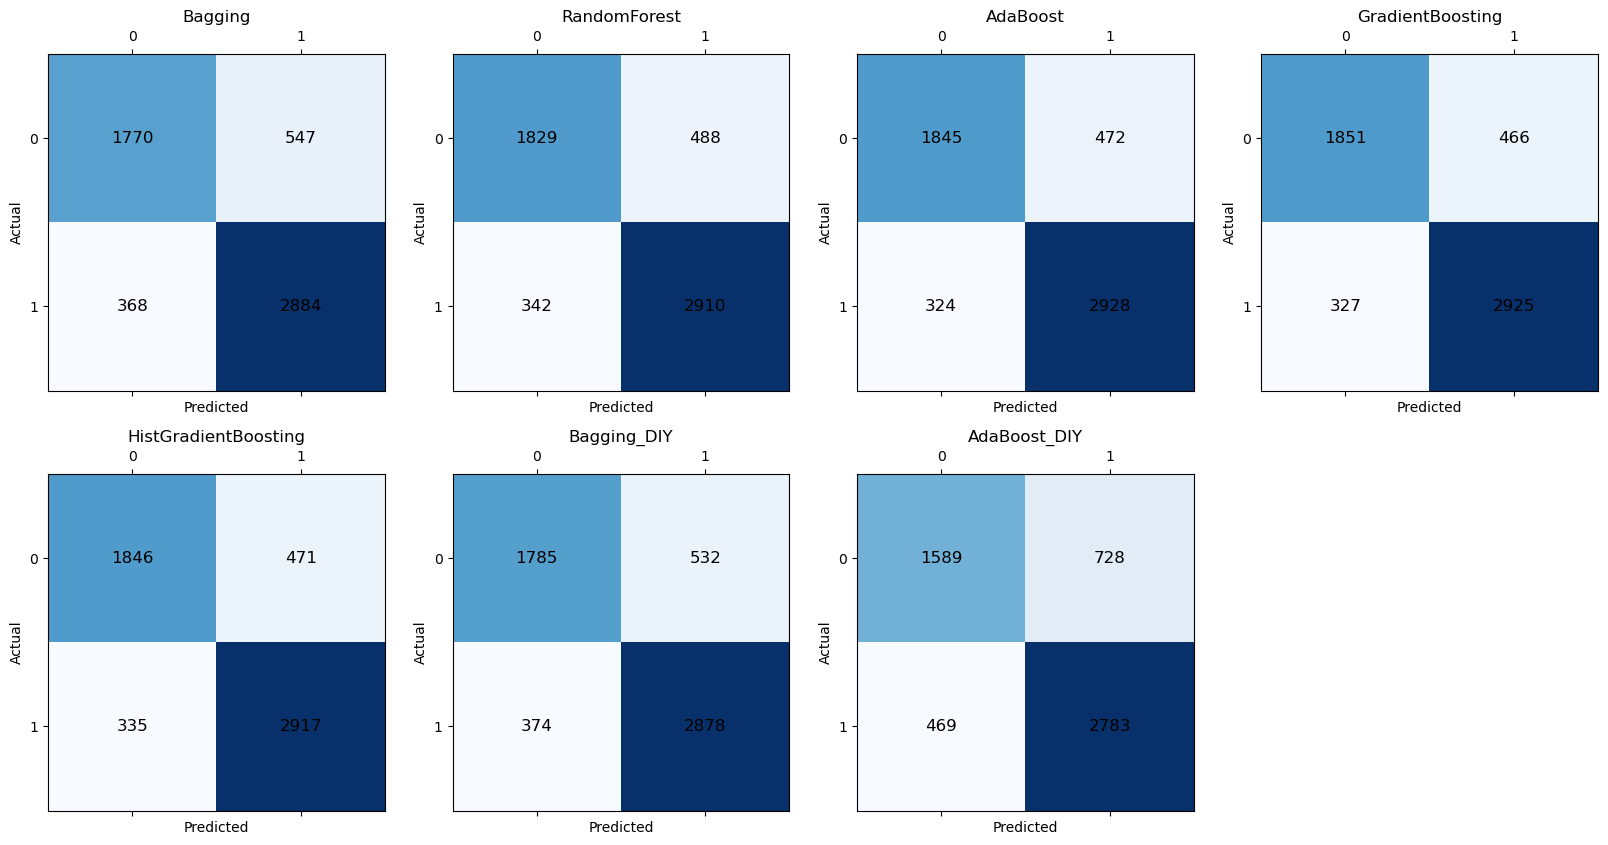

In [32]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()
for i, (cm, name) in enumerate(zip(confusion_matrices, model_names)):
    ax = axes[i]
    cax = ax.matshow(cm, cmap='Blues')
    for (j, k), value in np.ndenumerate(cm):
        ax.text(k, j, f'{value}', ha='center', va='center', color='black', fontsize=12)
    ax.set_title(name)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
fig.delaxes(axes[-1])

### Добавить новую модель.

In [33]:
add_models=["XGBoost","LightGBM","CatBoost"]
for model_name in add_models:
    print(f"\nOptimizing {model_name}...")
    study = optuna.create_study(direction="maximize")
    study.optimize(lambda trial: objective(trial, model_name, X_train, y_train), n_trials=20)
    print(f"Best Hyperparameters for {model_name}: {study.best_params}")
    print(f"Best Cross-Validation Accuracy: {study.best_value:.4f}")
    cm,acc = train_final_model(model_name, X_train, y_train, X_test, y_test, study.best_params)
    print(f"Final Test Accuracy: {acc}")
    print("Final Confusion Matrix:\n")
    print(cm)

[I 2024-12-11 17:57:38,683] A new study created in memory with name: no-name-cedc3a94-37b4-4ffb-bf15-b7e4ffe8020b



Optimizing XGBoost...


D:\tools\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:57:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
D:\tools\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:57:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
D:\tools\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:57:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
D:\tools\anaconda3\Lib\site-packages\xgboost\core.py:158: Use

D:\tools\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:57:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
D:\tools\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:57:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
D:\tools\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:57:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
D:\tools\anaconda3\Lib\site-packages\xgboost\core.py:158: Use

D:\tools\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:57:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
D:\tools\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:57:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
D:\tools\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:57:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
D:\tools\anaconda3\Lib\site-packages\xgboost\core.py:158: Use

D:\tools\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:57:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
D:\tools\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:57:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
D:\tools\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:57:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
D:\tools\anaconda3\Lib\site-packages\xgboost\core.py:158: Use

D:\tools\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:57:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
D:\tools\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:57:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
D:\tools\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:57:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
D:\tools\anaconda3\Lib\site-packages\xgboost\core.py:158: Use

D:\tools\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:57:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-12-11 17:57:57,266] A new study created in memory with name: no-name-3c73ee71-dbe9-4725-a647-94a2f8efd042


Best Hyperparameters for XGBoost: {'n_estimators': 153, 'max_depth': 3, 'learning_rate': 0.1897288673834507}
Best Cross-Validation Accuracy: 0.8442
Final Test Accuracy: 0.8556293769078829
Final Confusion Matrix:

[[1851  466]
 [ 338 2914]]

Optimizing LightGBM...
[LightGBM] [Info] Number of positive: 10439, number of negative: 7381
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000309 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 589
[LightGBM] [Info] Number of data points in the train set: 17820, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.585802 -> initscore=0.346640
[LightGBM] [Info] Start training from score 0.346640
[LightGBM] [Info] Number of positive: 10439, number of negative: 7381
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000199 seconds.
You can 

[I 2024-12-11 17:57:58,341] Trial 0 finished with value: 0.8421099887766555 and parameters: {'n_estimators': 133, 'max_depth': 7, 'learning_rate': 0.0742255785017263}. Best is trial 0 with value: 0.8421099887766555.


[LightGBM] [Info] Number of positive: 13048, number of negative: 9227
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000454 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 589
[LightGBM] [Info] Number of data points in the train set: 22275, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.585769 -> initscore=0.346501
[LightGBM] [Info] Start training from score 0.346501
[LightGBM] [Info] Number of positive: 10439, number of negative: 7381
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000312 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 589
[LightGBM] [Info] Number of data points in the train set: 17820, number of used features: 13
[LightGBM] [Info] [binar

[I 2024-12-11 17:57:59,229] Trial 1 finished with value: 0.8416161616161617 and parameters: {'n_estimators': 105, 'max_depth': 7, 'learning_rate': 0.12116958539527002}. Best is trial 0 with value: 0.8421099887766555.


[LightGBM] [Info] Number of positive: 10439, number of negative: 7381
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000223 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 589
[LightGBM] [Info] Number of data points in the train set: 17820, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.585802 -> initscore=0.346640
[LightGBM] [Info] Start training from score 0.346640
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 10439, number of negative: 7381
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of te

[I 2024-12-11 17:58:00,377] Trial 2 finished with value: 0.8407631874298541 and parameters: {'n_estimators': 152, 'max_depth': 6, 'learning_rate': 0.13277290937743602}. Best is trial 0 with value: 0.8421099887766555.


[LightGBM] [Info] Number of positive: 13048, number of negative: 9227
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000383 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 589
[LightGBM] [Info] Number of data points in the train set: 22275, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.585769 -> initscore=0.346501
[LightGBM] [Info] Start training from score 0.346501
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 10439, number of negative: 7381
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of te

[I 2024-12-11 17:58:01,562] Trial 3 finished with value: 0.8385185185185187 and parameters: {'n_estimators': 145, 'max_depth': 9, 'learning_rate': 0.1489838095447771}. Best is trial 0 with value: 0.8421099887766555.


[LightGBM] [Info] Number of positive: 10439, number of negative: 7381
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000259 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 589
[LightGBM] [Info] Number of data points in the train set: 17820, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.585802 -> initscore=0.346640
[LightGBM] [Info] Start training from score 0.346640
[LightGBM] [Info] Number of positive: 10439, number of negative: 7381
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000315 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 590
[LightGBM] [Info] Number of data points in the train set: 17820, number of used features: 13
[LightGBM] [Info] [binar

[I 2024-12-11 17:58:02,862] Trial 4 finished with value: 0.8415263748597083 and parameters: {'n_estimators': 152, 'max_depth': 8, 'learning_rate': 0.0772076357534855}. Best is trial 0 with value: 0.8421099887766555.


[LightGBM] [Info] Number of positive: 10439, number of negative: 7381
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000259 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 589
[LightGBM] [Info] Number of data points in the train set: 17820, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.585802 -> initscore=0.346640
[LightGBM] [Info] Start training from score 0.346640
[LightGBM] [Info] Number of positive: 10439, number of negative: 7381
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000308 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 590
[LightGBM] [Info] Number of data points in the train set: 17820, number of used features: 13
[LightGBM] [Info] [binar

[I 2024-12-11 17:58:03,744] Trial 5 finished with value: 0.8377553310886645 and parameters: {'n_estimators': 112, 'max_depth': 7, 'learning_rate': 0.27375692614949804}. Best is trial 0 with value: 0.8421099887766555.


[LightGBM] [Info] Number of positive: 10439, number of negative: 7381
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000324 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 589
[LightGBM] [Info] Number of data points in the train set: 17820, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.585802 -> initscore=0.346640
[LightGBM] [Info] Start training from score 0.346640
[LightGBM] [Info] Number of positive: 10439, number of negative: 7381
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000245 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 590
[LightGBM] [Info] Number of data points in the train set: 17820, number of used features: 13
[LightGBM] [Info] [binar

[I 2024-12-11 17:58:04,583] Trial 6 finished with value: 0.8416161616161617 and parameters: {'n_estimators': 86, 'max_depth': 10, 'learning_rate': 0.10196129217073313}. Best is trial 0 with value: 0.8421099887766555.


[LightGBM] [Info] Number of positive: 10439, number of negative: 7381
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000296 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 589
[LightGBM] [Info] Number of data points in the train set: 17820, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.585802 -> initscore=0.346640
[LightGBM] [Info] Start training from score 0.346640
[LightGBM] [Info] Number of positive: 10439, number of negative: 7381
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000341 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 590
[LightGBM] [Info] Number of data points in the train set: 17820, number of used features: 13
[LightGBM] [Info] [binar

[I 2024-12-11 17:58:05,505] Trial 7 finished with value: 0.8399102132435466 and parameters: {'n_estimators': 88, 'max_depth': 7, 'learning_rate': 0.029460318274396394}. Best is trial 0 with value: 0.8421099887766555.


[LightGBM] [Info] Number of positive: 10439, number of negative: 7381
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000312 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 589
[LightGBM] [Info] Number of data points in the train set: 17820, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.585802 -> initscore=0.346640
[LightGBM] [Info] Start training from score 0.346640
[LightGBM] [Info] Number of positive: 10439, number of negative: 7381
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000327 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 590
[LightGBM] [Info] Number of data points in the train set: 17820, number of used features: 13
[LightGBM] [Info] [binar

[I 2024-12-11 17:58:06,542] Trial 8 finished with value: 0.8413468013468013 and parameters: {'n_estimators': 114, 'max_depth': 9, 'learning_rate': 0.09756377057398279}. Best is trial 0 with value: 0.8421099887766555.


[LightGBM] [Info] Number of positive: 10439, number of negative: 7381
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000294 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 589
[LightGBM] [Info] Number of data points in the train set: 17820, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.585802 -> initscore=0.346640
[LightGBM] [Info] Start training from score 0.346640
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[I 2024-12-11 17:58:07,818] Trial 9 finished with value: 0.8349719416386083 and parameters: {'n_estimators': 178, 'max_depth': 6, 'learning_rate': 0.21079557729398885}. Best is trial 0 with value: 0.8421099887766555.


[LightGBM] [Info] Number of positive: 10439, number of negative: 7381
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000277 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 589
[LightGBM] [Info] Number of data points in the train set: 17820, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.585802 -> initscore=0.346640
[LightGBM] [Info] Start training from score 0.346640
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[I 2024-12-11 17:58:08,167] Trial 10 finished with value: 0.8240179573512908 and parameters: {'n_estimators': 53, 'max_depth': 4, 'learning_rate': 0.016467940617850722}. Best is trial 0 with value: 0.8421099887766555.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 10438, number of negative: 7382
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000360 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 588
[LightGBM] [Info] Number of data points in the train set: 17820, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.585746 -> initscore=0.346408
[LightGBM] [Info] Start training from score 0.346408
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[I 2024-12-11 17:58:08,989] Trial 11 finished with value: 0.8417059483726149 and parameters: {'n_estimators': 195, 'max_depth': 4, 'learning_rate': 0.19175746350646644}. Best is trial 0 with value: 0.8421099887766555.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 10439, number of negative: 7381
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000302 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 590
[LightGBM] [Info] Number of data points in the train set: 17820, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.585802 -> initscore=0.346640
[LightGBM] [Info] Start training from score 0.346640
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 10438, number of negative: 7382
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000260 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 588
[LightGBM] [Info] Number of data points in the train set: 17820, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.585746 -> initscore=0.346408
[LightGBM] [Info] Start training from score 0.346408
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[I 2024-12-11 17:58:09,818] Trial 12 finished with value: 0.8408978675645342 and parameters: {'n_estimators': 199, 'max_depth': 4, 'learning_rate': 0.20515563997997577}. Best is trial 0 with value: 0.8421099887766555.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-11 17:58:10,429] Trial 13 finished with value: 0.8445342312008979 and parameters: {'n_estimators': 198, 'max_depth': 3, 'learning_rate': 0.1913577698193647}. Best is trial 13 with value: 0.8445342312008979.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-11 17:58:10,984] Trial 14 finished with value: 0.8436363636363635 and parameters: {'n_estimators': 174, 'max_depth': 3, 'learning_rate': 0.26472381950883245}. Best is trial 13 with value: 0.8445342312008979.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 10439, number of negative: 7381
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000278 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 589
[LightGBM] [Info] Number of data points in the train set: 17820, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.585802 -> initscore=0.346640
[LightGBM] [Info] Start training from score 0.346640
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-11 17:58:11,556] Trial 15 finished with value: 0.8435016835016835 and parameters: {'n_estimators': 175, 'max_depth': 3, 'learning_rate': 0.2903967303542054}. Best is trial 13 with value: 0.8445342312008979.


[LightGBM] [Info] Number of positive: 13048, number of negative: 9227
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000420 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 589
[LightGBM] [Info] Number of data points in the train set: 22275, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.585769 -> initscore=0.346501
[LightGBM] [Info] Start training from score 0.346501
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Info] Number of positive: 10439, number of negative: 7381
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000230 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 590
[LightGBM] [Info] Number of data points in the train set: 17820, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.585802 -> initscore=0.346640
[LightGBM] [Info] Start training from score 0.346640
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-11 17:58:12,104] Trial 16 finished with value: 0.8433221099887765 and parameters: {'n_estimators': 173, 'max_depth': 3, 'learning_rate': 0.24612392663189891}. Best is trial 13 with value: 0.8445342312008979.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 10439, number of negative: 7381
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000273 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 589
[LightGBM] [Info] Number of data points in the train set: 17820, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.585

[LightGBM] [Info] Number of positive: 10439, number of negative: 7381
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000320 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 590
[LightGBM] [Info] Number of data points in the train set: 17820, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.585802 -> initscore=0.346640
[LightGBM] [Info] Start training from score 0.346640
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-11 17:58:13,130] Trial 17 finished with value: 0.835780022446689 and parameters: {'n_estimators': 185, 'max_depth': 5, 'learning_rate': 0.24635046449894968}. Best is trial 13 with value: 0.8445342312008979.


[LightGBM] [Info] Number of positive: 13048, number of negative: 9227
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000345 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 589
[LightGBM] [Info] Number of data points in the train set: 22275, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.585769 -> initscore=0.346501
[LightGBM] [Info] Start training from score 0.346501
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Info] Number of positive: 10439, number of negative: 7381
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000213 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 589
[LightGBM] [Info] Number of data points in the train set: 17820, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.585802 -> initscore=0.346640
[LightGBM] [Info] Start training from score 0.346640
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 10438, number of negative: 7382
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000290 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 588
[LightGBM] [Info] Number of data points in the train set: 17820, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.585746 -> initscore=0.346408
[LightGBM] [Info] Start training from score 0.346408
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-11 17:58:14,022] Trial 18 finished with value: 0.8389674523007855 and parameters: {'n_estimators': 158, 'max_depth': 5, 'learning_rate': 0.17835698878451306}. Best is trial 13 with value: 0.8445342312008979.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 10439, number of negative: 7381
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000228 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 589
[LightGBM] [Info] Number of data points in the train set: 17820, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.585802 -> initscore=0.346640
[LightGBM] [Info] Start training from score 0.346

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 10438, number of negative: 7382
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000244 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 587
[LightGBM] [Info] Number of data points in the train set: 17820, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.585746 -> initscore=0.346408
[LightGBM] [Info] Start training from score 0.346

[I 2024-12-11 17:58:14,537] Trial 19 finished with value: 0.8433670033670035 and parameters: {'n_estimators': 165, 'max_depth': 3, 'learning_rate': 0.24421157939153385}. Best is trial 13 with value: 0.8445342312008979.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-11 17:58:14,641] A new study created in memory with name: no-name-782ecd63-5102-4e50-9b7c-45df62750a29


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-11 17:58:16,814] Trial 0 finished with value: 0.8444893378226711 and parameters: {'n_estimators': 61, 'max_depth': 7, 'learning_rate': 0.1136548838908969}. Best is trial 0 with value: 0.8444893378226711.
[I 2024-12-11 17:58:19,261] Trial 1 finished with value: 0.8460157126823795 and parameters: {'n_estimators': 159, 'max_depth': 3, 'learning_rate': 0.24422069155882167}. Best is trial 1 with value: 0.8460157126823795.
[I 2024-12-11 17:58:21,917] Trial 2 finished with value: 0.844848484848485 and parameters: {'n_estimators': 143, 'max_depth': 4, 'learning_rate': 0.2978124518126492}. Best is trial 1 with value: 0.8460157126823795.
[I 2024-12-11 17:58:23,608] Trial 3 finished with value: 0.8447138047138048 and parameters: {'n_estimators': 78, 'max_depth': 4, 'learning_rate': 0.24183170848770166}. Best is trial 1 with value: 0.8460157126823795.
[I 2024-12-11 17:58:29,911] Trial 4 finished with value: 0.8404040404040403 and parameters: {'n_estimators': 143, 'max_depth': 9, 'learni

Best Hyperparameters for CatBoost: {'n_estimators': 114, 'max_depth': 3, 'learning_rate': 0.29323314855431537}
Best Cross-Validation Accuracy: 0.8465
Final Test Accuracy: 0.8550906805530616
Final Confusion Matrix:

[[1853  464]
 [ 343 2909]]


In [35]:
model_names = model_names+add_models
results_df = pd.DataFrame({
    "Model Name": model_names,
    "Accuracy": accuracy_list
})
results_df

,Model Name,Accuracy
0,Bagging,0.835698
1,RandomForest,0.850961
2,AdaBoost,0.857066
3,GradientBoosting,0.857605
4,HistGradientBoosting,0.855270
5,Bagging_DIY,0.837314
6,AdaBoost_DIY,0.785060
7,XGBoost,0.855629
8,LightGBM,0.854732
9,CatBoost,0.855091


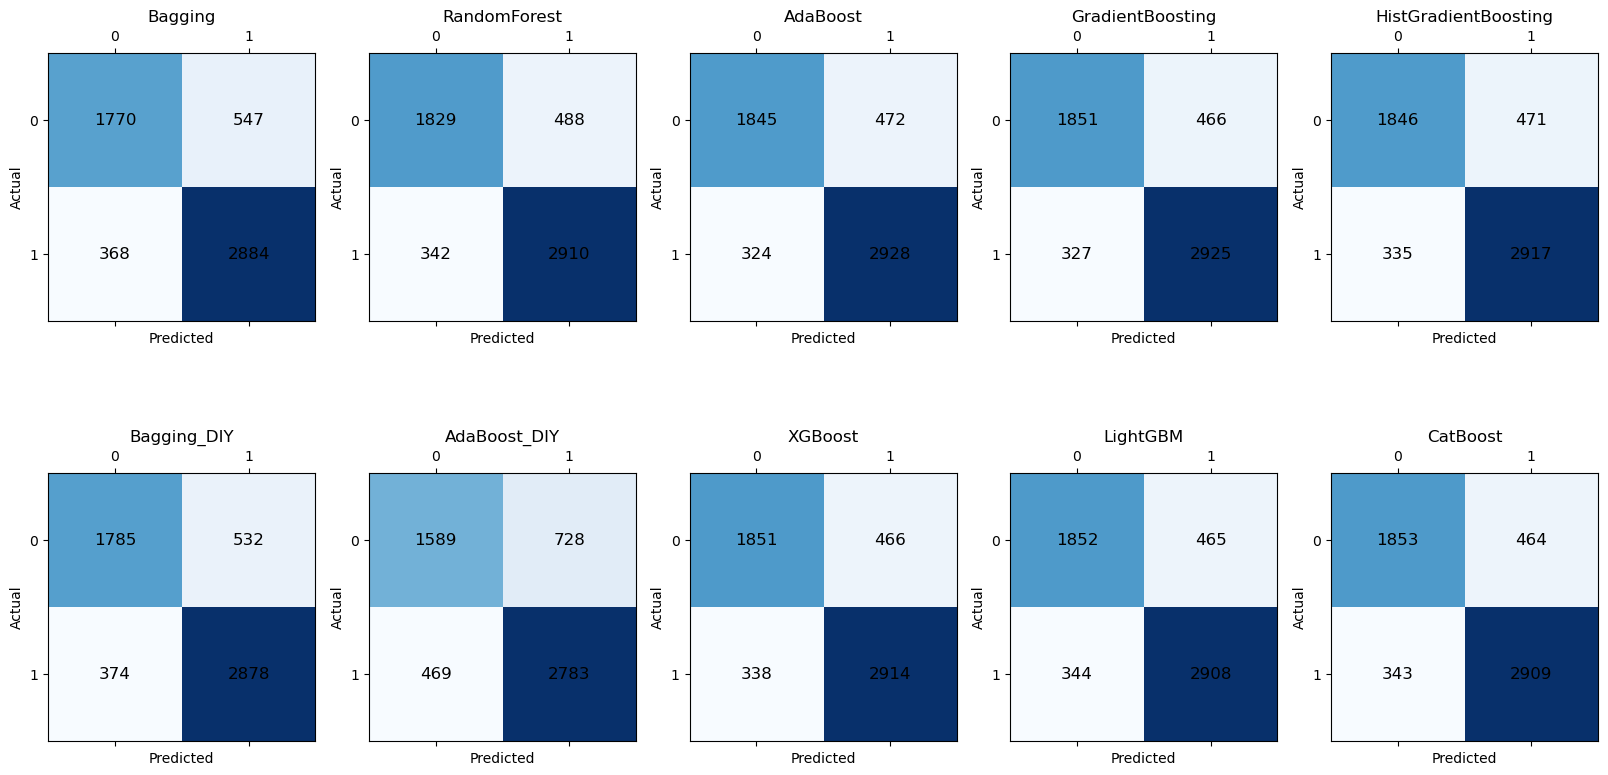

In [37]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
axes = axes.flatten()
for i, (cm, name) in enumerate(zip(confusion_matrices, model_names)):
    ax = axes[i]
    cax = ax.matshow(cm, cmap='Blues')
    for (j, k), value in np.ndenumerate(cm):
        ax.text(k, j, f'{value}', ha='center', va='center', color='black', fontsize=12)
    ax.set_title(name)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')